# 4. Regression Problem
## Example 1: Linear Regression on Housing Dataset

You've just been hired at a real estate investment firm and they would like you to build a model for pricing houses. You are given a dataset that contains data for house prices and a few features like number of bedrooms, size in square feet and age of the house. Let's see if you can build a model that is able to predict the price. In this exercise we extend what we have learned about linear regression to a dataset with more than one feature.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pandas import set_option

## 1. Understand Data With Descriptive Statistics
### 1.1. Peek at Your Data
create 2 variables called X and y: <br>
X shall be a matrix with 3 columns (sqft,bdrms,age) <br>
y shall be a vector with 1 column (price) <br>

In [2]:
df = pd.read_csv('housing-data.csv')

In [3]:
df.head()

,sqft,bdrms,age,price
0,2104,3,70,399900
1,1600,3,28,329900
2,2400,3,44,369000
3,1416,2,49,232000
4,3000,4,75,539900


### 1.2. Dimensions of Your Data
You must have a very good handle on how much data you have, both in terms of rows and columns.
  Too many rows and algorithms may take too long to train. Too few and perhaps you do not have enough data to train the algorithms.
  Too many features and some algorithms can be distracted or suffer poor performance due to the curse of dimensionality.

In [4]:
df.shape

(47, 4)

### 1.3. Data Type For Each Attribute
The type of each attribute is important. Strings may need to be converted to floating point values or integers to represent categorical or ordinal values. You can get an idea of the types of attributes by peeking at the raw data, as above. You can also list the data types used by the DataFrame to characterize each attribute using the dtypes property.

In [5]:
df.dtypes

sqft     int64
bdrms    int64
age      int64
price    int64
dtype: object

### 1.4. Descriptive Statistics
Descriptive statistics can give you great insight into the properties of each attribute. Often you can create more summaries than you have time to review. The describe() function on the Pandas DataFrame lists 8 statistical properties of each attribute. 

In [6]:
df.describe()

,sqft,bdrms,age,price
count,47.000000,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,42.744681,340412.659574
std,794.702354,0.760982,22.873440,125039.899586
min,852.000000,1.000000,5.000000,169900.000000
25%,1432.000000,3.000000,24.500000,249900.000000
50%,1888.000000,3.000000,44.000000,299900.000000
75%,2269.000000,4.000000,61.500000,384450.000000
max,4478.000000,5.000000,79.000000,699900.000000


## 2. Understand Data With Visualization
### 2.1. Univariate Plots
In this section we will look at three techniques that you can use to understand each attribute of your dataset independently.
  Histograms.
  Density Plots.
  Box and Whisker Plots.
#### Histograms
A fast way to get an idea of the distribution of each attribute is to look at histograms. Histograms group data into bins and provide you a count of the number of observations in each bin. From the shape of the bins you can quickly get a feeling for whether an attribute is Gaussian, skewed or even has an exponential distribution. It can also help you see possible outliers.

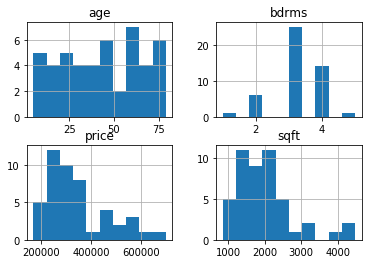

In [7]:
df.hist()
plt.show()

### 2.2. Multivariate Plots
This section provides examples of two plots that show the interactions between multiple variables in your dataset.
  Correlation Matrix Plot.   Scatter Plot Matrix.
#### Correlation Matrix Plot
Correlation gives an indication of how related the changes are between two variables. If two variables change in the same direction they are positively correlated. If they change in opposite directions together (one goes up, one goes down), then they are negatively correlated. You can calculate the correlation between each pair of attributes. This is called a correlation matrix. You can then plot the correlation matrix and get an idea of which variables have a high correlation with each other. This is useful to know, because some machine learning algorithms like linear and logistic regression can have poor performance if there are highly correlated input variables in your data.

In [8]:
df.corr()

,sqft,bdrms,age,price
sqft,1.000000,0.559967,0.079853,0.854988
bdrms,0.559967,1.000000,0.077486,0.442261
age,0.079853,0.077486,1.000000,0.051791
price,0.854988,0.442261,0.051791,1.000000


#### Scatter Plot Matrix
A scatter plot shows the relationship between two variables as dots in two dimensions, one axis for each attribute. You can create a scatter plot for each pair of attributes in your data. Drawing all these scatter plots together is called a scatter plot matrix. Scatter plots are useful for spotting structured relationships between variables, like whether you could summarize the relationship between two variables with a line. Attributes with structured relationships may also be correlated and good candidates for removal from your dataset.

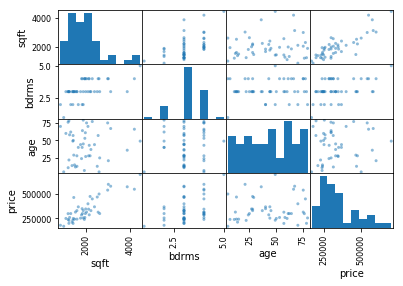

In [9]:
pd.plotting.scatter_matrix(df)
plt.show()
#Like the Correlation Matrix Plot above, the scatter plot matrix is symmetrical. 
#This is useful to look at the pairwise relationships from different perspectives. 

## 3. Prepare Your Data For Machine Learning 

Many machine learning algorithms make assumptions about your data. 
It is often a very good idea to prepare your data in such a way to best expose the structure of the problem to the machine learning algorithms that you intend to use. 
In this section you will discover how to prepare your data for machine learning in Python using scikit-learn. 
After completing this lesson you will know how to: 
Rescale data.
Standardize data. 
Normalize data. 
Binarize data. 

### 3.1. Rescale Data
When your data is comprised of attributes with varying scales, many machine learning algorithms can benefit from rescaling the attributes to all have the same scale. Often this is referred to as normalization and attributes are often rescaled into the range between 0 and 1. This is useful for optimization algorithms used in the core of machine learning algorithms like gradient descent. You can rescale your data using scikit-learn using the MinMaxScaler class

In [10]:
from sklearn.preprocessing import MinMaxScaler
array = df.values
# separate array into input and output components
X = array[:,0:3]
Y = array[:,3]

In [11]:
X

array([[2104,    3,   70],
       [1600,    3,   28],
       [2400,    3,   44],
       [1416,    2,   49],
       [3000,    4,   75],
       [1985,    4,   61],
       [1534,    3,   12],
       [1427,    3,   57],
       [1380,    3,   14],
       [1494,    3,   15],
       [1940,    4,    7],
       [2000,    3,   27],
       [1890,    3,   45],
       [4478,    5,   49],
       [1268,    3,   58],
       [2300,    4,   77],
       [1320,    2,   62],
       [1236,    3,   78],
       [2609,    4,    5],
       [3031,    4,   21],
       [1767,    3,   44],
       [1888,    2,   79],
       [1604,    3,   13],
       [1962,    4,   53],
       [3890,    3,   36],
       [1100,    3,   60],
       [1458,    3,   29],
       [2526,    3,   13],
       [2200,    3,   28],
       [2637,    3,   25],
       [1839,    2,   40],
       [1000,    1,    5],
       [2040,    4,   75],
       [3137,    3,   67],
       [1811,    4,   24],
       [1437,    3,   50],
       [1239,    3,   22],
 

In [12]:
Y

array([399900, 329900, 369000, 232000, 539900, 299900, 314900, 198999,
       212000, 242500, 239999, 347000, 329999, 699900, 259900, 449900,
       299900, 199900, 499998, 599000, 252900, 255000, 242900, 259900,
       573900, 249900, 464500, 469000, 475000, 299900, 349900, 169900,
       314900, 579900, 285900, 249900, 229900, 345000, 549000, 287000,
       368500, 329900, 314000, 299000, 179900, 299900, 239500])

In [13]:
scaler = MinMaxScaler()
rescaledX = scaler.fit_transform(X)
X = rescaledX
X

/Users/Apple/anaconda3/envs/dlwp/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


array([[0.34528406, 0.5       , 0.87837838],
       [0.20628792, 0.5       , 0.31081081],
       [0.42691671, 0.5       , 0.52702703],
       [0.1555433 , 0.25      , 0.59459459],
       [0.59238831, 0.75      , 0.94594595],
       [0.31246553, 0.75      , 0.75675676],
       [0.18808605, 0.5       , 0.09459459],
       [0.15857694, 0.5       , 0.7027027 ],
       [0.145615  , 0.5       , 0.12162162],
       [0.17705461, 0.5       , 0.13513514],
       [0.30005516, 0.75      , 0.02702703],
       [0.31660232, 0.5       , 0.2972973 ],
       [0.28626586, 0.5       , 0.54054054],
       [1.        , 1.        , 0.59459459],
       [0.11472697, 0.5       , 0.71621622],
       [0.39933811, 0.75      , 0.97297297],
       [0.12906784, 0.25      , 0.77027027],
       [0.10590182, 0.5       , 0.98648649],
       [0.48455598, 0.75      , 0.        ],
       [0.60093767, 0.75      , 0.21621622],
       [0.25234418, 0.5       , 0.52702703],
       [0.28571429, 0.25      , 1.        ],
       [0.

## 4. Evaluate the Performance of Machine Learning Algorithms
### 4.1. Split into Train and Test Sets 

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state=seed)
#Different Regression Machine Learning Methods
lin_model = LinearRegression()
#lin_model = Ridge()
#lin_model = Lasso()
#lin_model = ElasticNet()
#lin_model = DecisionTreeRegressor()
#lin_model = SVR()
lin_model.fit(X_train, Y_train)

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
mae = mean_absolute_error(Y_test, y_test_predict)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
MAE is 51521.422822607296
RMSE is 62647.96504604891
R2 score is 0.8113574812172442
